In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# Where the data is stored
DATA_ROOT = '../data/raw/'

# READ DATA
bodytext_dtypes = {'foi_documentId': str, 'foi_bodyTextOCR': str, 'foi_bodyText': str}
dossier_dtypes = {'dc_identifier': str, 'dc_publisher_name': str}
document_dtypes = {'dc_identifier': str, 'foi_dossierId': str, 'dc_source': str, 'foi_fileName': str,
                   'foi_nrPages': float}

In [12]:
print('Reading bodytext...')
bodytext_df = pd.read_csv(DATA_ROOT + 'woo_bodytext.csv', dtype=bodytext_dtypes, usecols=bodytext_dtypes.keys())
print('Reading dossiers...')
dossier_df = pd.read_csv(DATA_ROOT + 'woo_dossiers.csv', dtype=dossier_dtypes, usecols=dossier_dtypes.keys())
print('Reading documents...')
document_df = pd.read_csv(DATA_ROOT + 'woo_documents.csv', dtype=document_dtypes, usecols=document_dtypes.keys())


Reading bodytext...
Reading dossiers...
Reading documents...


In [13]:
# Total number of dossiers
number_of_dossiers = document_df['foi_dossierId'].unique().size
print('Total number of dossiers:', number_of_dossiers)

Total number of dossiers: 2725934


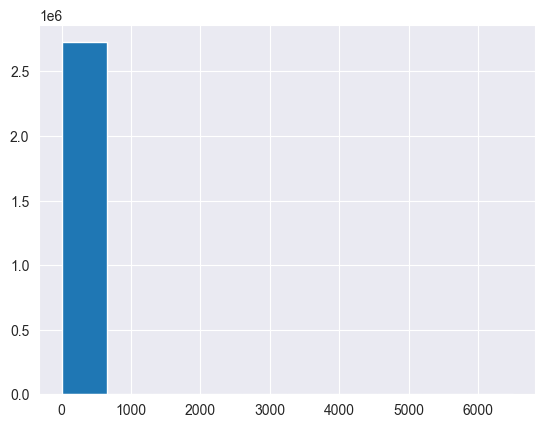

In [14]:
# Full histogram of the number of documents in the dossiers
document_df.groupby('foi_dossierId').size().hist()
plt.show()

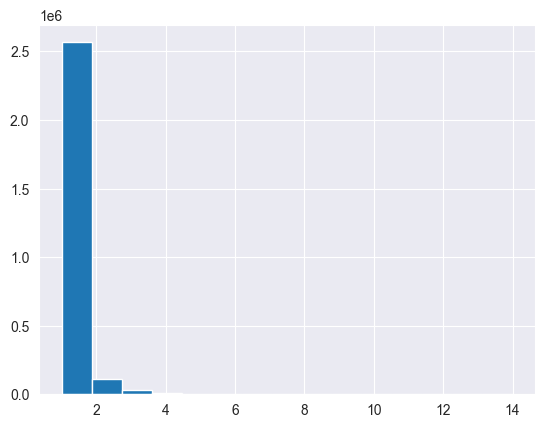

In [15]:
# Partial histogram of the number of documents in the dossiers
document_per_dossier = document_df.groupby('foi_dossierId').size()
document_per_dossier[document_per_dossier < 15].hist(bins=15)
plt.show()

In [17]:
# number of documents
number_of_documents = document_df['dc_identifier'].unique().size
print('Total number of documents:', number_of_documents)

Total number of documents: 3060154


## What went wrong
We used the foi_nrPages to create the histogram, instead of only the documents that have text

In [ ]:
# Full histogram of the number of pages in the documents
document_df['foi_nrPages'].hist()
plt.title('Number of pages in documents')
plt.xlabel('Number of pages')
plt.ylabel('Number of documents')
plt.show()

In [ ]:
# Partial histogram of the number of pages in the documents
document_df[document_df['foi_nrPages'] < 25].hist(bins=25)
plt.title('Number of pages in documents')
plt.xlabel('Number of pages')
plt.ylabel('Number of documents')
plt.show()

## What we were actually looking for
Using the bodytext_df, we can get the number of pages for the documents that have text

In [18]:
# Number of documents with text
number_of_documents_with_text = document_df[document_df['dc_identifier'].isin(bodytext_df['foi_documentId'])]
print('Number of documents with text:', len(number_of_documents_with_text))

Number of documents with text: 369194


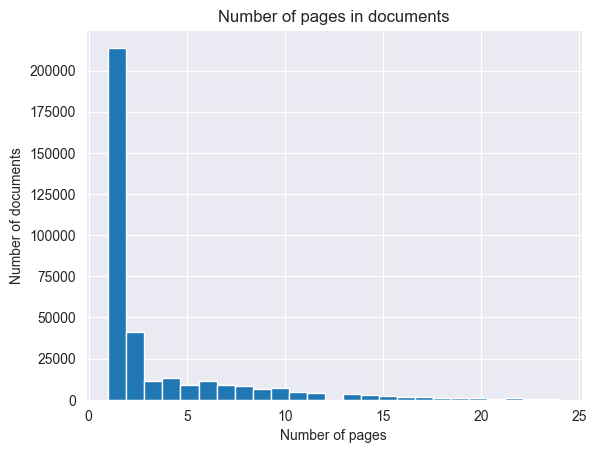

In [19]:
# number of pages per document, for documents we have text for
number_of_pages_per_doc = bodytext_df.groupby('foi_documentId').size()
number_of_pages_per_doc[number_of_pages_per_doc < 25].hist(bins=25)
plt.title('Number of pages in documents')
plt.xlabel('Number of pages')
plt.ylabel('Number of documents')
plt.show()